In [45]:
# Importing the Keras libraries and packages
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [46]:
# Part 1 - Develop a Baseline CNN Model

# A baseline model will show us a minimal model performance 
# to which other models will be compared

img_rows = 200
img_cols = 200
epochs = 20
batch_size = 64
num_of_train_samples = 5606
num_of_test_samples = 2397

In [47]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    pyplot.figure(figsize=(10,5))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='blue', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('\nClassification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='blue', label='test')
    pyplot.legend()
    # save plot to file
#     filename = sys.argv[0].split('/')[-1]
#     pyplot.savefig(filename + '_plot.png')
#     pyplot.close()
    pyplot.show()

In [48]:
# Function that calculates Confusion Matrix and shows Classification Report
def class_report(test_set, model):
    Y_pred = model.predict_generator(test_set, num_of_test_samples // batch_size+1)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_set.classes, y_pred))
    print('Classification Report')
    target_names = list(training_set.class_indices.keys())
    print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [49]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.3)


In [51]:
training_set = datagen.flow_from_directory('Artists_dataset', 
                                                 subset="training",
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size, shuffle = False,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('Artists_dataset', 
                                            subset="validation",
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle=False,
                                            class_mode='categorical')

Found 5606 images belonging to 11 classes.
Found 2397 images belonging to 11 classes.


In [52]:
print(test_set.class_indices)

{'Cezanne': 0, 'Degas': 1, 'Manet': 2, 'Matisse': 3, 'Monet': 4, 'Morisot': 5, 'Pissaro': 6, 'Renoir': 7, 'Sargent': 8, 'Sisley': 9, 'Sorolla': 10}


In [8]:
# VGG Blocks
# The basic building block of classic CNNs is a sequence of the following: 
#     (i) a convolutional layer with padding to maintain the resolution, 
#     (ii) a nonlinearity such as a ReLU, 
#     (iii) a pooling layer such as a max pooling layer. 
# One VGG block consists of a sequence of convolutional layers, 
# followed by a max pooling layer for spatial downsampling. 
# In the original VGG paper [Simonyan & Zisserman, 2014], the authors employed convolutions with  3×3  kernels 
# with padding of 1 (keeping height and width) 
# and  2×2  max pooling with stride of 2 (halving the resolution after each block). 

In [54]:
# Define CNN model with one VGG-style block
# The 1-block VGG model has a single convolutional layer with 32 filters 
# followed by a max pooling layer
def baseline_model_1():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(11, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [59]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_1()
# Fit model
history = model.fit_generator(training_set, 
                              steps_per_epoch=len(training_set), # = num_of_train_samples // batch_size +1
                              validation_data=test_set, 
                              validation_steps=len(test_set), # = num_of_test_samples // batch_size +1
                              epochs= epochs, 
                              verbose = 0)

In [60]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 37.2966


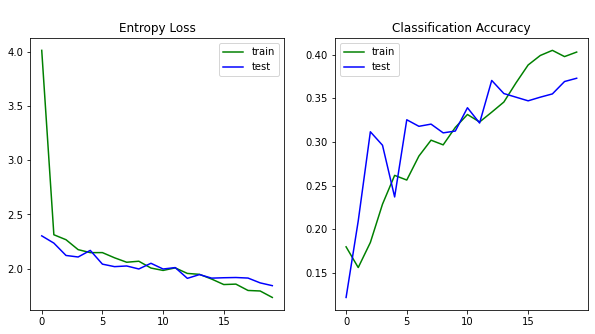

In [61]:
# Build graphs
summarize_diagnostics(history)

In [13]:
class_report(test_set, model)

Confusion Matrix
[[ 53  23   0  38  18   0   8  13   7   0  16]
 [ 17 101   0  13   5   0   4  36   6   0   5]
 [ 23  11   0   2   7   0   3   8  14   0   2]
 [ 39  33   0 161  25   0   3  26   6   0   9]
 [ 47  34   0  54 183   0  54  19  10   4   5]
 [  8  20   0  15   8   0   7  10   0   0   4]
 [ 36  38   0  13  45   0 117   9   1   2   5]
 [ 33  90   0  38  15   0  32 192  19   1   3]
 [ 35  47   0  38  28   0  12  24  50   0   6]
 [ 14  10   0  11  52   0  40   5   1   7   1]
 [ 17  27   0  17   8   0   7  10   3   0  21]]
Classification Report
              precision    recall  f1-score   support

     Cezanne       0.16      0.30      0.21       176
       Degas       0.23      0.54      0.33       187
       Manet       0.00      0.00      0.00        70
     Matisse       0.40      0.53      0.46       302
       Monet       0.46      0.45      0.46       410
     Morisot       0.00      0.00      0.00        72
     Pissaro       0.41      0.44      0.42       266
      Reno

In [14]:
# Define CNN model with two VGG-style blocks
def baseline_model_2():
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(11, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# define model
model = baseline_model_2()
# fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs, 
                              verbose = 0)

In [16]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 37.5887


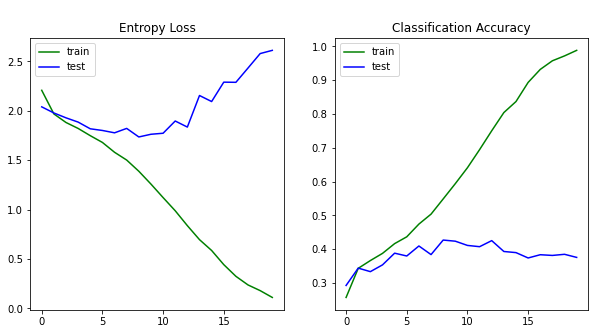

In [17]:
# Build graphs
summarize_diagnostics(history)

In [18]:
# Define CNN model with three VGG-style blocks
def baseline_model_3():
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
# 3d block
    model.add(Conv2D(128, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(11, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_3()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs, 
                              verbose = 0)

In [20]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 43.3458


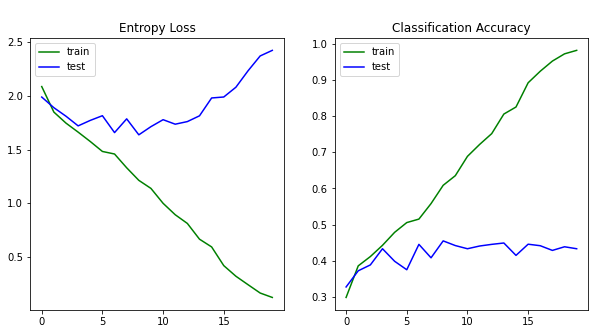

In [21]:
# Build graphs
summarize_diagnostics(history)

In [3]:
# Part 2 - Add Dropout Regularization and Data Augmentation
# to our Baseline model step by step and evaluate an efficiency  
# ___________________________________________________________


# 1 step - Add Dropout

In [33]:
# Define CNN model with Dropout Regularization
def model_with_dropout():
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
   
   
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
   

    model.add(Conv2D(128, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(11, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = model_with_dropout()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs, 
                              verbose=0)

Epoch 1/20
88/88 [==============================] - 174s 2s/step - loss: 2.3661 - accuracy: 0.1617 - val_loss: 2.1674 - val_accuracy: 0.2858
Epoch 2/20
88/88 [==============================] - 192s 2s/step - loss: 2.2082 - accuracy: 0.2440 - val_loss: 2.0763 - val_accuracy: 0.3116
Epoch 3/20
88/88 [==============================] - 193s 2s/step - loss: 2.1458 - accuracy: 0.2692 - val_loss: 2.0508 - val_accuracy: 0.3100
Epoch 4/20
88/88 [==============================] - 203s 2s/step - loss: 2.0748 - accuracy: 0.3103 - val_loss: 2.0054 - val_accuracy: 0.3588
Epoch 5/20
88/88 [==============================] - 200s 2s/step - loss: 2.0762 - accuracy: 0.3000 - val_loss: 1.9889 - val_accuracy: 0.3358
Epoch 6/20
88/88 [==============================] - 182s 2s/step - loss: 1.9926 - accuracy: 0.3450 - val_loss: 1.9064 - val_accuracy: 0.3725
Epoch 7/20
88/88 [==============================] - 169s 2s/step - loss: 1.9720 - accuracy: 0.3366 - val_loss: 1.8716 - val_accuracy: 0.3655
Epoch 8/20
88

In [35]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 47.4343


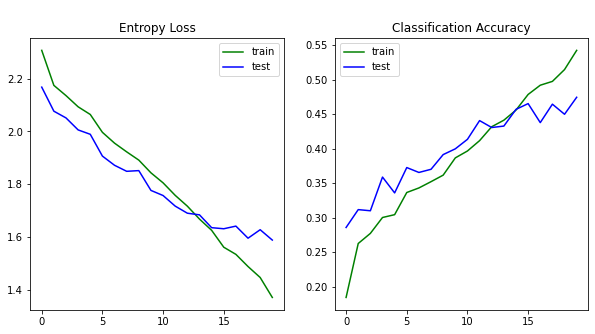

In [36]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# 2 step - Add Data augmentation
# Use our model with dropout

In [68]:
# # Create data generators 
# # Train generator with data augmentation
# train_datagen = ImageDataGenerator(rescale=1. / 255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest',
#                                    validation_split=0.3,
#                                   )

# test_datagen = ImageDataGenerator(rescale=1. / 255,
#                                   validation_split=0.3)

In [70]:
# # Create sets
# training_set = train_datagen.flow_from_directory('Artists_dataset', 
#                                                  subset="training",
#                                                  target_size=(img_rows, img_cols),
#                                                  batch_size=batch_size,
#                                                  shuffle=False,
#                                                  class_mode='categorical')


# test_set = train_datagen.flow_from_directory('Artists_dataset', 
#                                             subset="validation",
#                                             target_size=(img_rows, img_cols),
#                                             batch_size=batch_size,
#                                             shuffle=False,
#                                             class_mode='categorical')

Found 5606 images belonging to 11 classes.
Found 2397 images belonging to 11 classes.


In [71]:
# # Define model
# model = model_with_dropout()
# # Fit model
# history = model.fit_generator(training_set, 
#                               steps_per_epoch=len(training_set),
#                               validation_data=test_set, 
#                               validation_steps=len(test_set), 
#                               epochs= epochs)

Epoch 1/20
77/88 [=========================>....] - ETA: 18s - loss: 4.9713 - accuracy: 0.1271

KeyboardInterrupt: 

In [ ]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

In [ ]:
# Build graphs
summarize_diagnostics(history)

In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (5, 5), input_shape=(img_rows, img_cols, 3), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (5, 5), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (5, 5), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(11))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# #Train
# model.fit(training_set,
#                     steps_per_epoch=num_of_train_samples // batch_size,
#                     epochs=epochs,
#                     validation_data=test_set,
#                     validation_steps=num_of_test_samples // batch_size)